## Optimizing Marketing Impact with XgBoost and A/B Testing

In [1]:
#You are a machine learning engineer at "WeSellStuff", a rapidly expanding online retail platform. Recently, the marketing team launched a series of targeted adverts and item discounts to boost user interactions and sales. They are now keen to deploy traditional machine learning techniques in combination with A/B testing to assess and refine their marketing strategies. The head of marketing is looking to evaluate and determine the impact of combined use of XgBoost and A/B testing methodologies to find the best models to increase the revenue while minimizing costs.

In [2]:
# Basic data manipulation and numerical operations
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning preprocessing and utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Model imports
from xgboost import XGBRegressor
from sklearn.cluster import KMeans

# Model persistence (saving and loading)
from joblib import dump, load

# Statistical testing
from scipy.stats import ttest_rel  # Import paired t-test function

# Time-related functionality (if you need to time some operations)
import time

In [3]:
# Step 2: Load Training and Test Data
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('testing.csv')
print(train_data.head())

   user_id  age  gender user_type  purchase_history  avg_session_duration  \
0      179   64  Female       VIP                20             14.930296   
1      388   18  Female   Regular                14             59.226214   
2      862   56  Female   Regular                45             43.268684   
3      746   51  Female       VIP                31             19.398599   
4      298   54    Male       New                30             23.411151   

   last_login_days  total_spend  product_reviews  adverts_targeted  \
0               12   345.851376               18                 4   
1              215   217.583045               18                 4   
2              203   503.395449                6                44   
3              351   823.916242                5                48   
4              306   395.079011               16                 7   

   discount_offered  sales  
0                30   68.4  
1                30   68.4  
2                30   76.4  


In [4]:
# Handle categorical variables like gender and user_type using label encoding.
label_encoder = LabelEncoder()
for column in ['gender', 'user_type']:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

In [5]:
# List of numerical columns for scaling
numerical_columns = ['age', 'purchase_history', 'avg_session_duration', 'last_login_days', 
                     'total_spend', 'product_reviews', 'adverts_targeted', 'discount_offered', 
                     ]

# Apply Standard Scaling to numerical columns
scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

In [6]:
#Split Features and Target to divide the data into input features (X) and the target/output variable (y) by executing this code:
#Separate the features and target variables for both training and testing data.
X_train = train_data.drop(['sales', 'user_id'], axis=1) # Dropping user_id
y_train = train_data['sales']
X_test = test_data.drop(['sales', 'user_id'], axis=1) # Dropping user_id
y_test = test_data['sales']

In [7]:
#Define models for testing by creating a dictionary featuring different model names and parameters, which can be set up for training using the following code:
#Let's define some models for testing
#'reg:squarederror : performing a regression task
models = {
    "XGBoost_LearningRate_0_1_MaxDepth_1": XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=1),
    "XGBoost_LearningRate_0_5_MaxDepth_1": XGBRegressor(objective='reg:squarederror', learning_rate=0.5, max_depth=1),
    "XGBoost_LearningRate_1_MaxDepth_1": XGBRegressor(objective='reg:squarederror', learning_rate=1, max_depth=1),
    "XGBoost_LearningRate_0_1_MaxDepth_2": XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=2),
    "XGBoost_LearningRate_0_5_MaxDepth_2": XGBRegressor(objective='reg:squarederror', learning_rate=0.5, max_depth=2),
    "XGBoost_LearningRate_1_MaxDepth_2": XGBRegressor(objective='reg:squarederror', learning_rate=1, max_depth=2),
    "XGBoost_LearningRate_0_1_MaxDepth_3": XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=3),
    "XGBoost_LearningRate_0_5_MaxDepth_3": XGBRegressor(objective='reg:squarederror', learning_rate=0.5, max_depth=3),
    "XGBoost_LearningRate_1_MaxDepth_3": XGBRegressor(objective='reg:squarederror', learning_rate=1, max_depth=3),
    "XGBoost_LearningRate_0_1_MaxDepth_4": XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=4),
    "XGBoost_LearningRate_0_5_MaxDepth_4": XGBRegressor(objective='reg:squarederror', learning_rate=0.5, max_depth=4),
    "XGBoost_LearningRate_1_MaxDepth_4": XGBRegressor(objective='reg:squarederror', learning_rate=1, max_depth=4)
}

In [8]:
# Training loop
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} - Model Trained Successfully!")
    filename = f'{name}_model.joblib'
    dump(model, filename)

XGBoost_LearningRate_0_1_MaxDepth_1 - Model Trained Successfully!
XGBoost_LearningRate_0_5_MaxDepth_1 - Model Trained Successfully!
XGBoost_LearningRate_1_MaxDepth_1 - Model Trained Successfully!
XGBoost_LearningRate_0_1_MaxDepth_2 - Model Trained Successfully!
XGBoost_LearningRate_0_5_MaxDepth_2 - Model Trained Successfully!
XGBoost_LearningRate_1_MaxDepth_2 - Model Trained Successfully!
XGBoost_LearningRate_0_1_MaxDepth_3 - Model Trained Successfully!
XGBoost_LearningRate_0_5_MaxDepth_3 - Model Trained Successfully!
XGBoost_LearningRate_1_MaxDepth_3 - Model Trained Successfully!
XGBoost_LearningRate_0_1_MaxDepth_4 - Model Trained Successfully!
XGBoost_LearningRate_0_5_MaxDepth_4 - Model Trained Successfully!
XGBoost_LearningRate_1_MaxDepth_4 - Model Trained Successfully!


### Evaluate and A/B Test ML Models for Accuracy and Efficiency

In [9]:
#Evaluate the machine learning models using a test dataset, focusing on their predictive accuracy through Mean Squared Error (MSE) and R-squared value. Identify the model with the lowest MSE and highest R-squared so that you can select the most accurate predictive model. Then, employ A/B testing to verify if the leading model significantly outperforms the contenders.

In [10]:
#Evaluate the Models by using a combination of the lowest prediction error (MSE) and the highest proportion of explained variance using this code:

# Compute R-squared for the control model
model_results = {}
 
# Evaluate and save performance metrics for models
for name in models.keys():
    filename = f'{name}_model.joblib'
    model = load(filename)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_results[name] = {'MSE': mse, 'R²': r2}
    print(f"{name} - Mean Squared Error: {mse}, R-squared: {r2}")

XGBoost_LearningRate_0_1_MaxDepth_1 - Mean Squared Error: 210.2071629946019, R-squared: 0.5838711171798955
XGBoost_LearningRate_0_5_MaxDepth_1 - Mean Squared Error: 214.11901539940635, R-squared: 0.5761271623698959
XGBoost_LearningRate_1_MaxDepth_1 - Mean Squared Error: 216.03553373082707, R-squared: 0.5723331973080162
XGBoost_LearningRate_0_1_MaxDepth_2 - Mean Squared Error: 208.1414963744039, R-squared: 0.5879603381688294
XGBoost_LearningRate_0_5_MaxDepth_2 - Mean Squared Error: 230.62366920362115, R-squared: 0.5434543311921265
XGBoost_LearningRate_1_MaxDepth_2 - Mean Squared Error: 264.5900789307821, R-squared: 0.4762139768111656
XGBoost_LearningRate_0_1_MaxDepth_3 - Mean Squared Error: 211.72659372383652, R-squared: 0.5808632319923903
XGBoost_LearningRate_0_5_MaxDepth_3 - Mean Squared Error: 226.1264904137207, R-squared: 0.5523570058632632
XGBoost_LearningRate_1_MaxDepth_3 - Mean Squared Error: 306.2851748461506, R-squared: 0.3936738129310938
XGBoost_LearningRate_0_1_MaxDepth_4 - M

In [11]:
#Identify the best model in regards to the combination of lowest prediction error (MSE) and the highest proportion of explained variance by executing this code:

# Identifying the model with the lowest MSE and highest R²
best_model_name = min(model_results, key=lambda k: (model_results[k]['MSE'], -model_results[k]['R²']))
best_model_performance = model_results[best_model_name]
 
print(f"\nBest Model: {best_model_name}")
print(f"- Mean Squared Error: {best_model_performance['MSE']}")
print(f"- R-squared: {best_model_performance['R²']}")


Best Model: XGBoost_LearningRate_0_1_MaxDepth_2
- Mean Squared Error: 208.1414963744039
- R-squared: 0.5879603381688294


In [12]:
#Perform A/B testing to check if the predictions of the main model are significantly different from the predictions of other models by executing this code:

# Load control model and make predictions Performance testing
control_model = load(f'{best_model_name}_model.joblib')
control_predictions = control_model.predict(X_test)
y_pred_control = control_model.predict(X_test)
control_r2 = r2_score(y_test, y_pred_control)
control_model_name=best_model_name
 
# Iterate through other models and perform t-tests
for name in models.keys():
    test_model = load(f'{name}_model.joblib')
    test_predictions = test_model.predict(X_test)
 
    # Perform paired t-test between control and test group predictions 
    t_stat, p_value = ttest_rel(control_predictions, test_predictions)
 
    # Print results
    print(f"A/B Testing Between {control_model_name} and {name}:")
    print(f"- T-Statistic: {t_stat}")
    print(f"- P-Value: {p_value}")
    if p_value < 0.01:
        print(f"-> Significant difference between the models (99% confidence level).\n")
    else:
        print(f"-> No significant difference between the models (99% confidence level).\n")

A/B Testing Between XGBoost_LearningRate_0_1_MaxDepth_2 and XGBoost_LearningRate_0_1_MaxDepth_1:
- T-Statistic: 0.6815075651671433
- P-Value: 0.4963427213959508
-> No significant difference between the models (99% confidence level).

A/B Testing Between XGBoost_LearningRate_0_1_MaxDepth_2 and XGBoost_LearningRate_0_5_MaxDepth_1:
- T-Statistic: -0.05813547942655496
- P-Value: 0.953699048039883
-> No significant difference between the models (99% confidence level).

A/B Testing Between XGBoost_LearningRate_0_1_MaxDepth_2 and XGBoost_LearningRate_1_MaxDepth_1:
- T-Statistic: 0.36523254434546626
- P-Value: 0.7153257147127231
-> No significant difference between the models (99% confidence level).

A/B Testing Between XGBoost_LearningRate_0_1_MaxDepth_2 and XGBoost_LearningRate_0_1_MaxDepth_2:
- T-Statistic: nan
- P-Value: nan
-> No significant difference between the models (99% confidence level).

A/B Testing Between XGBoost_LearningRate_0_1_MaxDepth_2 and XGBoost_LearningRate_0_5_MaxDepth_

In [13]:
#Note from the results that there are no Significant Differences from the control model, as per a 95% confidence level.

In [14]:
#Conclude to consider other factors such as computational efficiency and that they could become the deciding factor for model selection.

### Evaluate Model Efficiency by Calculation Prediction Times

In [15]:
#Conduct speed tests on the selected and competing models, measuring the time for single and bulk predictions (batch of 1000 samples). Analyze and visualize the data through horizontal bar charts to differentiate between the single and bulk prediction metrics, aiming to pinpoint the most efficient model for deployment.

In [16]:
#1. Load Control Model into memory for testing by executing the following code:

# Load control model for speed testing
control_model = load(f'{control_model_name}_model.joblib')

In [17]:
#2. Initialize Lists for Data Collection to store model names and speed testing results.

# Speed testing
model_names = []
single_pred_times = []
bulk_pred_times = []

In [18]:
#3. Speed Test for Control Model (Single Prediction) by measuring how long the control model takes to make a single prediction.

# Speed testing for control model
start_time = time.time()
control_predictions_single = control_model.predict(X_test[0:1])  # using only the first sample
end_time = time.time()
control_single_pred_time = end_time - start_time

In [19]:
#4. Speed Test for Control Model (Bulk Prediction) by measuring how long the control model takes to predict 1000 samples.

start_time = time.time()
control_predictions_bulk = control_model.predict(X_test[0:1000])  # using the first 1000 samples
end_time = time.time()
control_bulk_pred_time = end_time - start_time

In [20]:
#5. Update Data Collection Lists for Control Model by adding the results from the control model into your data collection lists.

model_names.append(control_model_name)
single_pred_times.append(control_single_pred_time)
bulk_pred_times.append(control_bulk_pred_time)

In [21]:
# Speed Test for Other Models by looping through all models and repeat Steps 3-5 for each.

for name in models.keys():
    test_model = load(f'{name}_model.joblib')
    
    # Single prediction speed test
    start_time = time.time()
    test_predictions_single = test_model.predict(X_test[0:1])
    end_time = time.time()
    single_pred_time = end_time - start_time
    
    # Bulk prediction speed test (using 1000 samples)
    start_time = time.time()
    test_predictions_bulk = test_model.predict(X_test[0:1000])
    end_time = time.time()
    bulk_pred_time = end_time - start_time
    
    model_names.append(name)
    single_pred_times.append(single_pred_time)
    bulk_pred_times.append(bulk_pred_time)

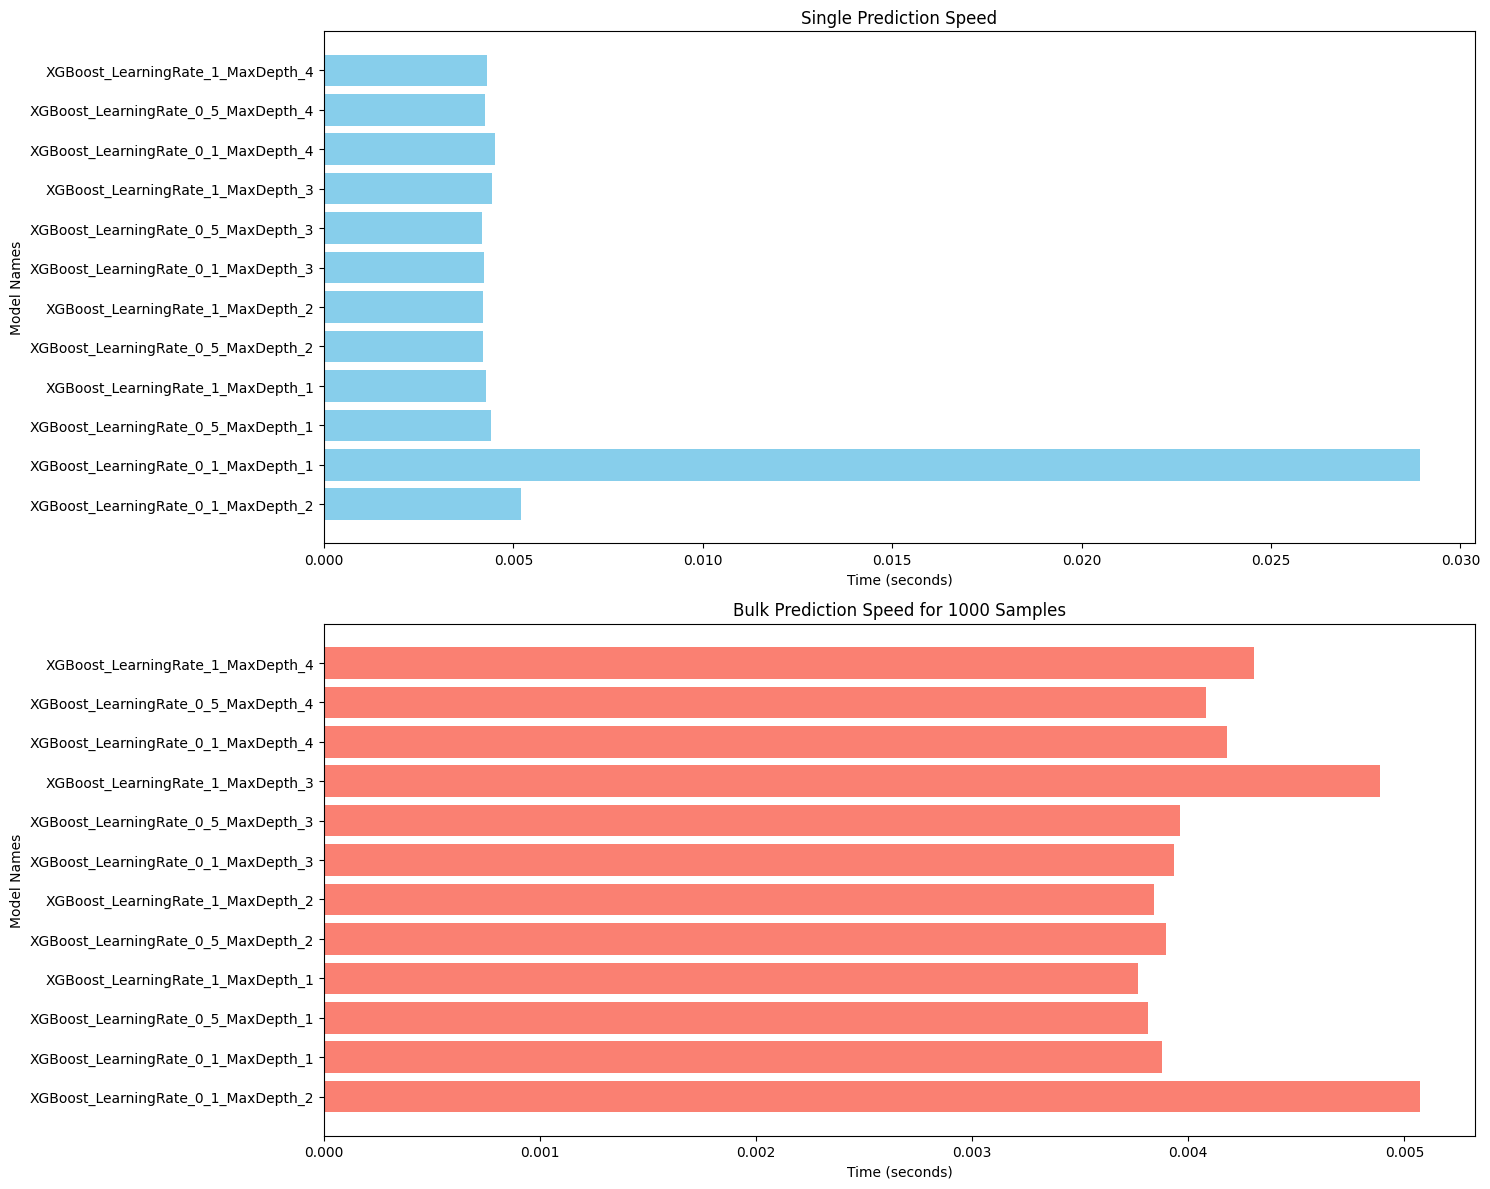

In [22]:
# Conduct a visualization of the speed results to easily compare them by using matplotlib to create horizontal bar charts.

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(15, 12))
 
# Single Prediction Times
ax[0].barh(model_names, single_pred_times, color='skyblue')
ax[0].set_title('Single Prediction Speed')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Model Names')
 
# Bulk Prediction Times
ax[1].barh(model_names, bulk_pred_times, color='salmon')
ax[1].set_title('Bulk Prediction Speed for 1000 Samples')
ax[1].set_xlabel('Time (seconds)')
ax[1].set_ylabel('Model Names')
 
plt.tight_layout()
plt.show()

In [23]:
# Review the results and note that all models have comparable prediction speed.

In [24]:
#Review the results of the best model XGBoost_LearningRate_0_1_MaxDepth_2 and note that it ranges in the middle, meaning that it can be a good fit.

### Identify Importance of Selected Features

In [25]:

#Evaluate the impact of 'adverts_targeted' and 'discount_offered' within the top machine learning model. Do this by analizing and visualiz the feature importance scoes using a bar plot to guide future strategy adjustments.

In [26]:
#List Dataset Features by printing all the features in your training dataset (X_train).

import seaborn as sns
import matplotlib.pyplot as plt
 
print("Features in the dataset:")
for feature in X_train.columns:
    print(feature)

Features in the dataset:
age
gender
user_type
purchase_history
avg_session_duration
last_login_days
total_spend
product_reviews
adverts_targeted
discount_offered


In [27]:
#Load the Best Model by using the load function to retrieve your top-performing machine learning model.

best_model = load(f'{best_model_name}_model.joblib')

In [28]:
#Analyze Feature Importance by extracting the importance of each feature.

feature_importance = best_model.feature_importances_

In [29]:
#Filter Selected Features by focusing on 'adverts_targeted' and 'discount_offered'.

selected_features = ['adverts_targeted', 'discount_offered']
indices = [list(X_train.columns).index(feature) for feature in selected_features]
selected_importances = [feature_importance[i] for i in indices]

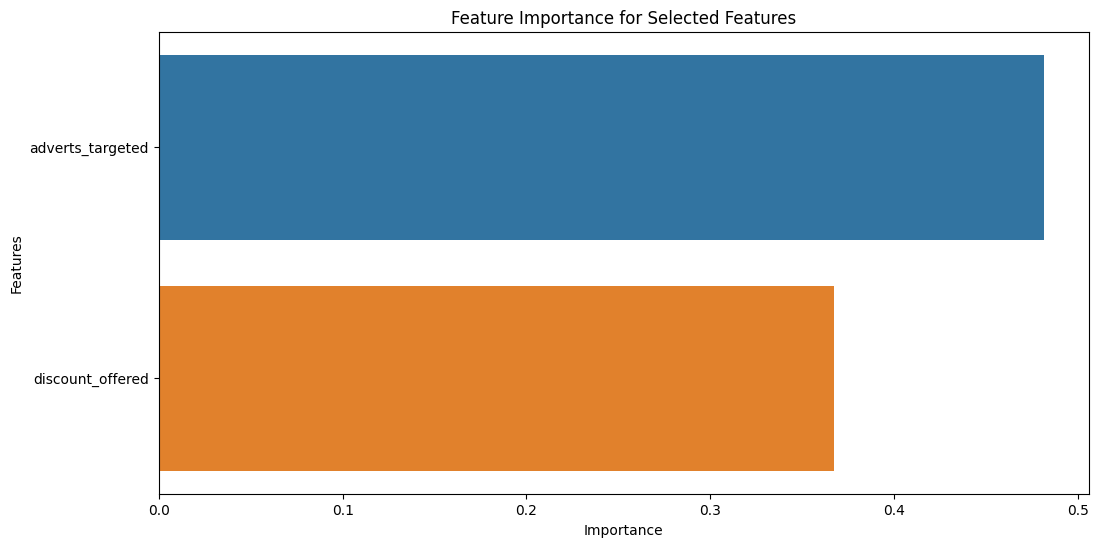

In [30]:
#Visualize Importance by generating a bar plot.

plt.figure(figsize=(12, 6))
sns.barplot(x=selected_importances, y=selected_features)
plt.title('Feature Importance for Selected Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [31]:
#Insight Extraction by printing the importance score.

print("Influential features in order:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature} - Importance: {selected_importances[i-1]:.4f}")

Influential features in order:
1. adverts_targeted - Importance: 0.4817
2. discount_offered - Importance: 0.3673


### Perform Sales Optimization through Adverts and Discounts Analysis

In [32]:
#Determine the ideal combination of these elements to maximize sales. Utilize a predictive grid to initiate a series of machine learning predictions, evaluating their impact on sales. Illustrate the findings using heatmaps and line graphs to explore the relationship between advertising frequency and discount levels. Conclude by forecasting average sales with the optimal values identified, offering actionable insights for strategic adjustments.

In [33]:
#1. Set Value Ranges & Initialize Grid to define possible advert and discount values and create a grid for storing predictions.

# Define possible values
adverts_values = list(range(1, 11))
discount_values = list(range(1, 11))
 
# Create a grid for predictions
predictions = np.zeros((len(adverts_values), len(discount_values)))

In [34]:
#2. Run Predictions  by looping through each combination to predict outcomes for each advert and discount combination.

# Make predictions for each combination
for i, adverts in enumerate(adverts_values):
    for j, discount in enumerate(discount_values):
        # Create a sample with all features set to their average (or median) values
        sample = X_train.mean().to_dict()
        sample['adverts_targeted'] = adverts
        sample['discount_offered'] = discount
        
        # Convert dictionary to DataFrame
        df_sample = pd.DataFrame([sample])
        
        # Make prediction
        predictions[i, j] = best_model.predict(df_sample)[0]

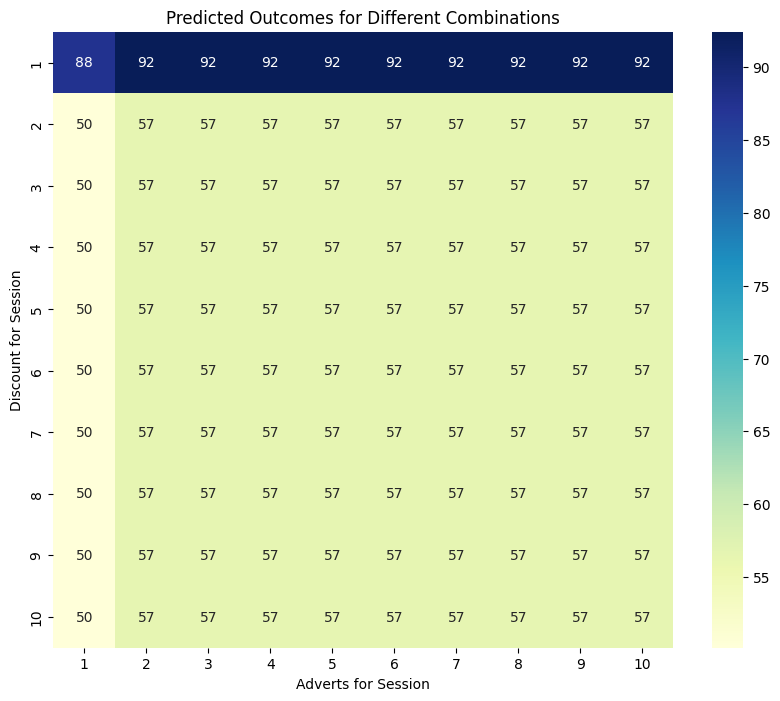

In [35]:
#3. Visualize the results by creating a Heatmap Visualization

# Visualization for Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(predictions, xticklabels=adverts_values, yticklabels=discount_values, annot=True, cmap='YlGnBu')
plt.title('Predicted Outcomes for Different Combinations')
plt.xlabel('Adverts for Session')
plt.ylabel('Discount for Session')
plt.show()
 
df_predictions = pd.DataFrame(predictions, columns=discount_values, index=adverts_values)

In [36]:
#4. Flatten Predictions by converting the prediction grid to a 1D array.

df_predictions = pd.DataFrame({
    'Adverts': np.repeat(adverts_values, len(discount_values)),
    'Discounts': np.tile(discount_values, len(adverts_values)),
    'Predictions': predictions.ravel()
})

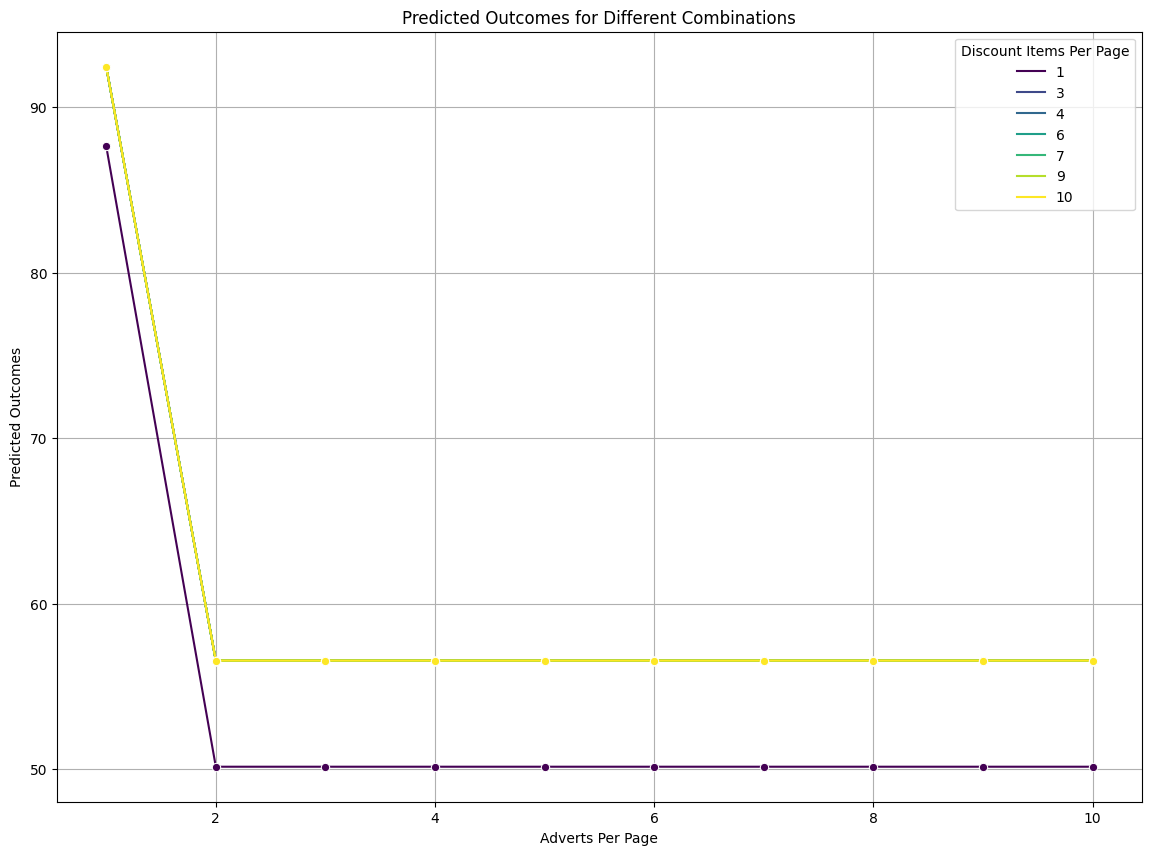

In [37]:
#5. Visualize the results by plotting a line graph.

# Visualization for Line Graph
plt.figure(figsize=(14, 10))
sns.lineplot(x='Adverts', y='Predictions', hue='Discounts', data=df_predictions, palette='viridis', marker="o")
plt.title('Predicted Outcomes for Different Combinations')
plt.xlabel('Adverts Per Page')
plt.ylabel('Predicted Outcomes')
plt.legend(title='Discount Items Per Page')
plt.grid(True)
plt.show()

In [38]:
#6. Identify Optimal Number of Adverts & Discounts per page that are predicted to maximize sales, based on the machine learning model's analysis:

# Find the indices of the maximum predicted value
optimal_idx = np.unravel_index(predictions.argmax(), predictions.shape)
optimal_adverts = adverts_values[optimal_idx[0]]
optimal_discounts = discount_values[optimal_idx[1]]
 
print(f"The optimal number of adverts per page for maximizing sales is: {optimal_adverts}")
print(f"The optimal number of discounts per page for maximizing sales is: {optimal_discounts}")

The optimal number of adverts per page for maximizing sales is: 1
The optimal number of discounts per page for maximizing sales is: 2


In [39]:
#Use the optimal advert and discount values to run the final prediction and output the result.

sample = X_train.mean().to_dict()
sample['adverts_targeted'] = optimal_adverts
sample['discount_offered'] = optimal_discounts
 
# Convert dictionary to DataFrame and predict
df_sample = pd.DataFrame([sample])
predicted_sales_optimal = best_model.predict(df_sample)[0]
 
print(f"Predicted average sale with {optimal_adverts} adverts and {optimal_discounts} discounts per page: {predicted_sales_optimal}")

Predicted average sale with 1 adverts and 2 discounts per page: 92.44770812988281


In [40]:
#Review and note the output of the optimized number of adverts and discounts combination including the predicted sales.

#Predicted average sale with 1 adverts and 2 discounts per page: 92.44770812988281

### Determine Financial Impact & Provide Recommendations

In [41]:
## Briefly justify the chosen model and assess the potential financial impact of implementing the machine learning model's suggestions. Calculate the possible increase in revenue by comparing current and projected average sales, taking into account the number of instances (customers) using the training data. The analysis should quantify the financial advantages, aiding in optimizing marketing expenditures and maximizing ROI.

In [42]:
#1. Justify the Model Choice

#The XGBoost model with a learning rate of 0.1 and max depth of 3 emerges as the top performer, excelling in key metrics like training efficiency and accuracy. Its balanced configuration makes it agile for quick iterations without sacrificing reliability, aligning seamlessly with our data-driven marketing objectives.

In [43]:
#2. Calculate essential statistical metrics by using mean of sales and number of instances (customers) for the sales data based on the training data.

df= train_data
 
# Calculate statistics
count = len(df)
mean_sales = df['sales'].mean()
 
# Print calculated values
print(f"Count: {count} (Number of instances)")
print(f"Mean (Average) Sales: Approximately ${mean_sales:.2f}")

Count: 800 (Number of instances)
Mean (Average) Sales: Approximately $82.46


In [44]:
#3. Evaluate Financial Impact & Recommendations

#Present the potential revenue increase use projections based on historical data and model predictions.

#Revenue Increase: If the model's recommendations can increase the average sales from $82.46 to $92.45, then over 800 instances, the potential revenue increase would be $(92.45 - 82.46) * 800 = $7,992.

#This increase signifies the potential of our model's recommendations allowing us to optimize marketing and derive more value from our investments.